In [147]:
import pandas as pd
from sklearn.model_selection import KFold      #For K-Fold Cross Validation
from sklearn.model_selection import cross_val_score    #To generate accuracy values of each fold of K-Fold
from sklearn.ensemble import BaggingClassifier  #To run the bagging technique
from sklearn.tree import DecisionTreeClassifier #Using decision trees in bagging technique

In [148]:
df=pd.read_excel('/content/glass.xlsx',sheet_name='glass')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [149]:
print(df.info())
print(df.isnull().sum())
print(df.describe)
#Since there is no missing values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64
<bound method NDFrame.describe of           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39

In [150]:
#Data Preprocessing
array1 = df.values
array1

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  7.     ]])

In [151]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [152]:
X = array1[:,0:9]
Y = array1[:,9]

In [153]:
X.shape

(214, 9)

In [154]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X=scale.fit_transform(X)
X

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

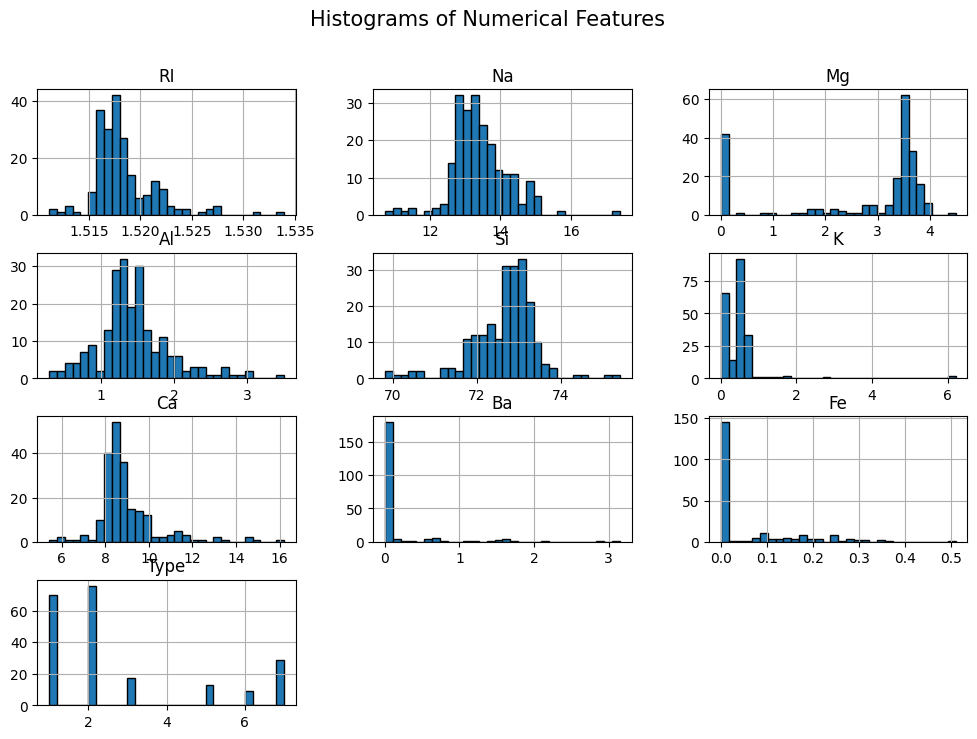

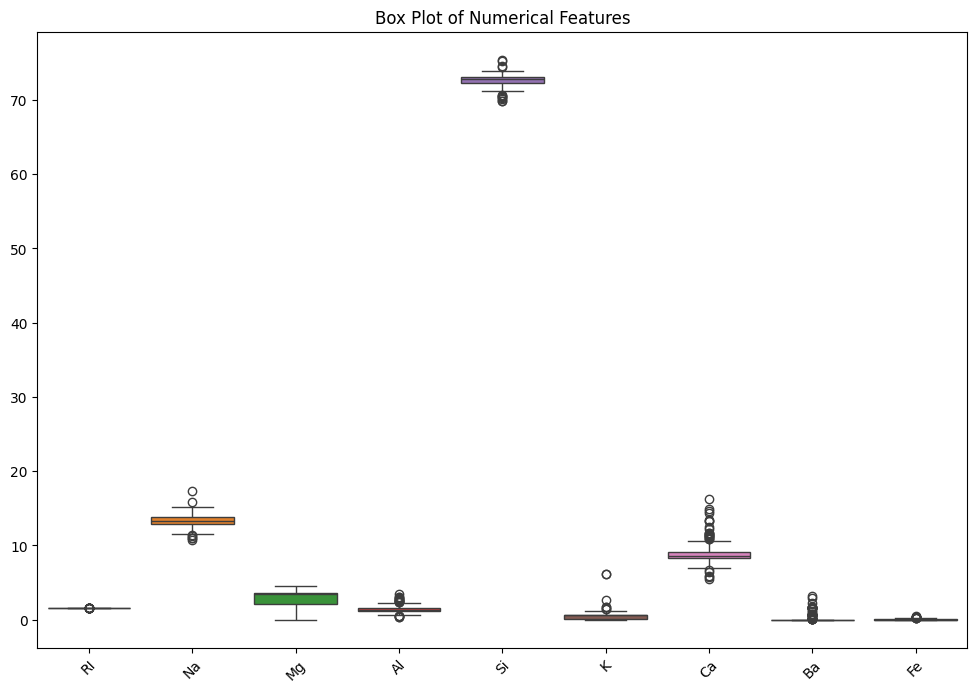

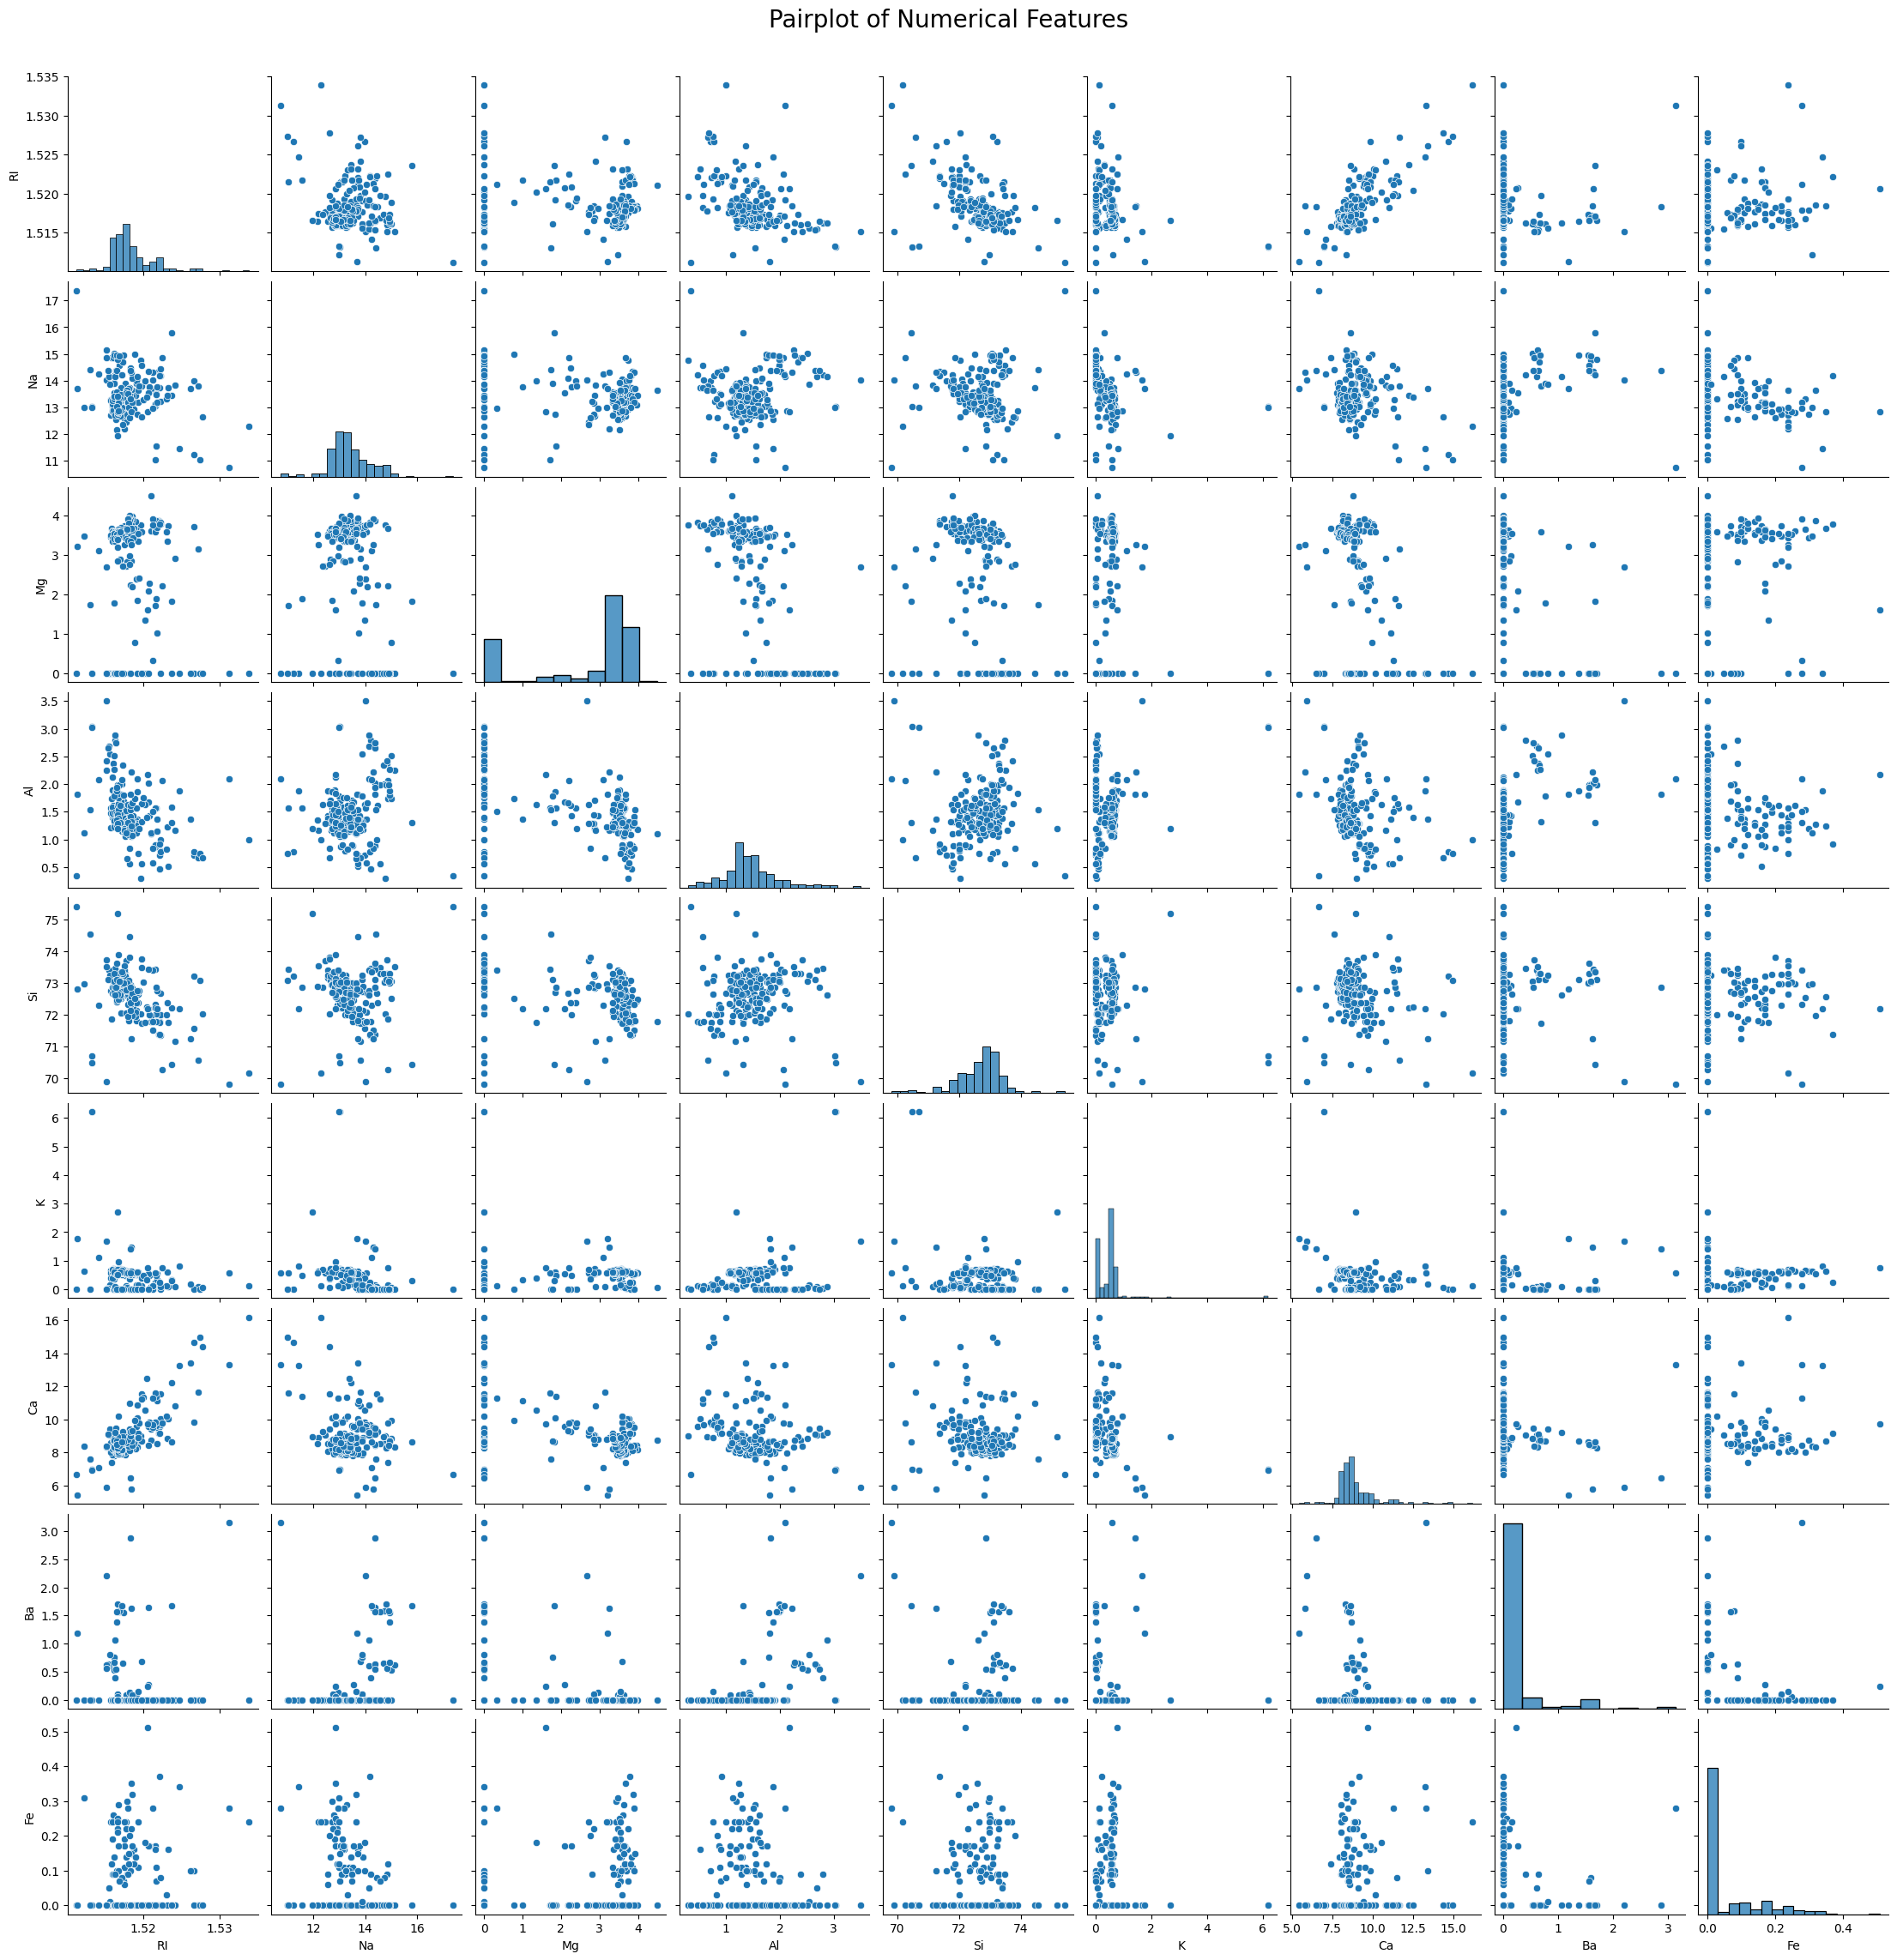

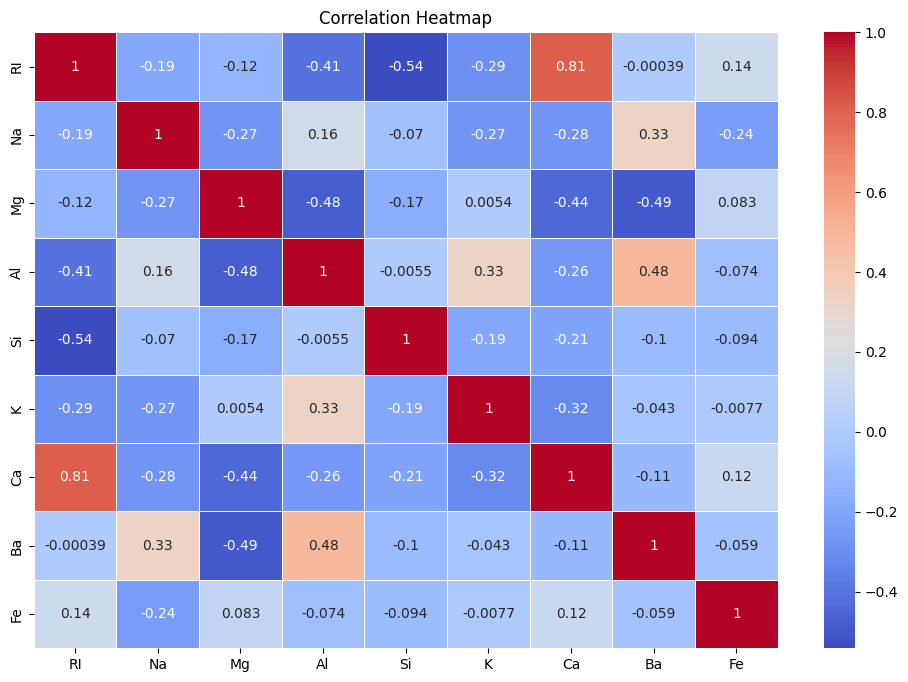

In [155]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for all numerical features
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Histograms of Numerical Features", fontsize=15)
plt.show()

numerical_features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_features])
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Features")
plt.show()

sns.pairplot(df[numerical_features])
plt.suptitle("Pairplot of Numerical Features",fontsize=20, y=1.02)
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [156]:
#Random Forest Model Implementation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [157]:
X=df.iloc[:,0:9]
y=df.iloc[:,9]

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 171
Testing set size: 43


In [160]:
kfold = KFold(n_splits=8, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=101, max_features=3,criterion='gini')
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model.fit(X_train, y_train)

0.7898860398860399


RandomForestClassifier(max_features=3, n_estimators=101)

In [161]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Evaluation Metrics:
Accuracy: 0.7907
Precision: 0.8101
Recall: 0.7907
F1-Score: 0.7920

Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.73      0.73      0.73        15
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.79        43
   macro avg       0.86      0.79      0.81        43
weighted avg       0.81      0.79      0.79        43



In [162]:
# Bagging
kfold_bag = KFold(n_splits=8, random_state=7,shuffle=True)
cart_bag = DecisionTreeClassifier()
model_bag = BaggingClassifier(estimator=cart_bag, n_estimators=101, random_state=7)
results_bag = cross_val_score(model, X, Y, cv=kfold)
print(results_bag.mean())

0.7617521367521367


In [163]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier
kfold_ada = KFold(n_splits=8, random_state=7,shuffle=True)
model_ada = AdaBoostClassifier(n_estimators=50, random_state=7)
results_ada = cross_val_score(model, X, Y, cv=kfold)
print(results_ada.mean())

0.7758190883190883


In [164]:
print('model1:',results_bag.mean())
print('model2:',results_ada.mean())

model1: 0.7617521367521367
model2: 0.7758190883190883


In [ ]:
#1. Explain Bagging and Boosting Methods. How Are They Different from Each Other?
 # ANS: Bagging and Boosting are ensemble learning techniques used to improve the performance of machine learning models by combining multiple models. However, they differ in their approach and methodology.

#1.Bagging (Bootstrap Aggregating):
#What it does:
  #1.Bagging creates multiple subsets of the original dataset (with replacement) and trains a separate model on each subset.
  #2.The final prediction is obtained by averaging (for regression) or voting (for classification) the predictions of all models.

#Key Characteristics:
   #1.Parallel Training: Models are trained independently, making it suitable for parallel processing.
   #2.Reduces Variance: Helps reduce overfitting by averaging out the predictions of multiple models.
   #3.Works Well with High-Variance Models: Effective for models like decision trees that tend to overfit.

#Example Algorithm: Random Forest (an ensemble of decision trees using bagging).

#Advantages:
  #Improves stability and accuracy.
  #Reduces overfitting.

#Disadvantages:
  #May not improve performance for low-variance models (e.g., linear regression).

#2.Boosting:
#What it does:
   #Boosting trains models sequentially, where each model tries to correct the errors of the previous model.
   #Models are weighted based on their performance, and the final prediction is a weighted sum of all models.

#Key Characteristics:
    #Sequential Training: Models are trained one after another, with each model focusing on the mistakes of the previous one.
    #Reduces Bias: Helps improve the accuracy of weak models by focusing on difficult-to-predict instances.
    #Works Well with High-Bias Models: Effective for models like shallow decision trees.

#Example Algorithms: AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost.

#Advantages:
    #Often achieves higher accuracy than bagging.
    #Can handle complex datasets.

#Disadvantages:
    #More prone to overfitting if not properly regularized.
    #Computationally expensive due to sequential training.


#2. How to Handle Imbalance in the Data?
# ANS: Imbalanced data occurs when the distribution of classes in a dataset is not uniform (e.g., 90% of samples belong to one class, and 10% belong to another). Handling imbalanced data is crucial because most machine learning algorithms assume balanced class distributions and may perform poorly on minority classes.

#Techniques to Handle Imbalanced Data:
 #A) Resampling Techniques:
    #1.Oversampling:
       #Increase the number of samples in the minority class by duplicating existing samples or generating synthetic samples.
       #Example: SMOTE (Synthetic Minority Oversampling Technique) creates synthetic samples for the minority class.

    #2.Undersampling:
      #Reduce the number of samples in the majority class by randomly removing samples.
      #Example: Random undersampling.

    #3.Hybrid Approaches:
      #Combine oversampling and undersampling to balance the dataset.

 #B) Class Weighting:
    #Adjust the weights of classes during model training to give more importance to the minority class.
    #Example: In scikit-learn, you can use class_weight='balanced' in algorithms like Logistic Regression, Decision Trees, etc.

 #C) Algorithmic Approaches:
    #Use algorithms that are inherently robust to imbalanced data, such as:
    #Decision Trees and Random Forests (can handle imbalance with class weighting).
    #Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost) often perform well on imbalanced data.

  #D) Evaluation Metrics:
    #Use appropriate evaluation metrics that are sensitive to imbalanced data:
    #Precision, Recall, F1-Score: Focus on the performance of the minority class.
    #ROC-AUC: Measures the model's ability to distinguish between classes.
    #Confusion Matrix: Provides a detailed breakdown of true/false positives/negatives

  #E) Ensemble Methods:
    #Use ensemble techniques like Bagging or Boosting to improve performance on imbalanced data.
    #Example: Balanced Random Forest (a variant of Random Forest that balances class distribution).









